# Matplotlib使用详解IV
## 密度和等高线图

有时，用轮廓或颜色编码的区域在二维空间中显示三维数据是很有用的。

有三个Matplotlib函数可以帮助完成这个任务:``plt.contour``绘制等高线图，``plt.contourf``填充等高线图，而``plt.imshow``展示图像。

本次实验将讨论几个使用它们的例子。我们将首先设置notebook，以绘制和导入我们将使用的函数:

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
import numpy as np

## 绘制一个三维函数

我们将首先演示一个使用函数$z = f(x, y)$的等高线图，当我们使用它作为数组broadcasting的激励示例时，使用以下特定选项$f$：

In [4]:
def f(x, y):
    return np.sin(x) ** 10 + np.cos(10 + y * x) * np.cos(x)

可以用``plt.contour``函数来创建等高线图。

它需要三个参数:一个*x*值的网格，一个*y*值的网格，以及一个*z*值的网格。

*x*和*y*值表示图上的位置，*z*值将用等值线表示。

也许准备这些数据最直接的方法就是使用``np.meshgrid`` 函数，从一维数组中构建二维网格:

In [5]:
x = np.linspace(0, 5, 50)
y = np.linspace(0, 5, 40)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

现在让我看一下这个只有线条的等高线图：

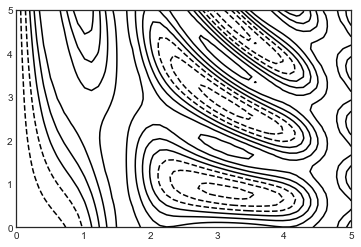

In [7]:
plt.contour(X, Y, Z, colors='black');

注意，当使用单一颜色时，负值用虚线表示，用实线表示正值。

或者，可以通过用 ``cmap`` 参数指定colormap来对行进行颜色编码。

在这里，我们还将指定我们想要在数据范围内以同样间隔的间隔间隔增加更多的行:

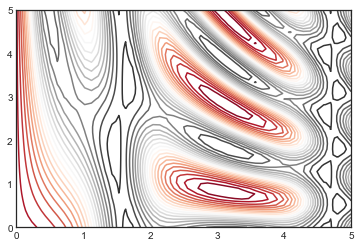

In [8]:
plt.contour(X, Y, Z, 20, cmap='RdGy');

在这里，我们选择了``RdGy``(缩写为*Red-Gray*)的colormap，这是一个很好的中心数据选择。

Matplotlib有各种各样的可使用的colormaps，您可以通过在“plt”上完成一个标签完成来轻松浏览IPython。厘米的模块:

```
plt.cm.<TAB>
```

我们的剧情看起来更好，但是台词之间的空间可能有点让人分心。

我们可以通过使用``plt.contourf()``函数(注意到末尾的``f`` )切换到一个填充的等高线图来改变这一点，它使用的语法与``plt.contour()``基本相同。

此外，我们还将添加一个``plt.colorbar()``命令，该命令会自动创建一个带有标签颜色信息的附加轴:

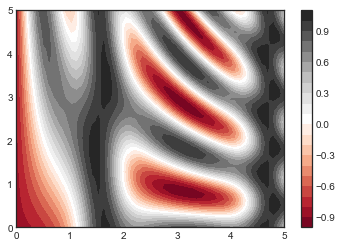

In [6]:
plt.contourf(X, Y, Z, 20, cmap='RdGy')
plt.colorbar();

colorbar清楚地表明黑色区域是“峰值”，而红色区域是“山谷”。

这个情节的一个潜在问题是它有点“污点”。也就是说，颜色步骤是离散的而不是连续的，这并不总是理想的。

这可以通过设置一个非常高的数字来弥补，但这导致了一个相当低效的情节:Matplotlib必须在级别上每一步呈现一个新的多边形。

一个更好的处理方法是使用``plt.imshow()``函数，它将一个二维的数据网格解释为一个图像。

下面的代码显示了这一点:

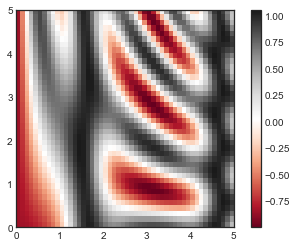

In [7]:
plt.imshow(Z, extent=[0, 5, 0, 5], origin='lower',
           cmap='RdGy')
plt.colorbar()
plt.axis(aspect='image');

然而，``imshow()``有一些潜在的陷阱：
- ``plt.imshow()`` 不接受*x*和*y*网格，因此您必须手动指定图上图像的*范围[*xmin*, *xmax*, *ymin*, *ymax*]。
- ``plt.imshow()`` 默认情况下，按照标准的图像数组定义，原点位于左上方，而不是在大多数等高线图中左下角。当显示网格数据时，必须改变这一点。
- ``plt.imshow()`` 将自动调整轴宽比与输入数据匹配;这可以通过设置来改变，例如，``plt.axis(aspect='image')``使*x*和 *y* 单位匹配。

最后，将等高线图和图像块结合起来是很有用的。

例如，在这里，我们将使用部分透明的背景图像(通过``alpha``参数设置透明度)，并在轮廓上使用标签(使用 ``plt.clabel()``函数):

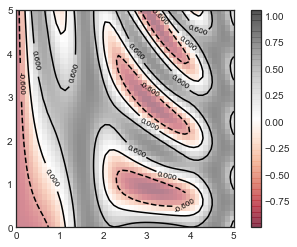

In [8]:
contours = plt.contour(X, Y, Z, 3, colors='black')
plt.clabel(contours, inline=True, fontsize=8)

plt.imshow(Z, extent=[0, 5, 0, 5], origin='lower',
           cmap='RdGy', alpha=0.5)
plt.colorbar();

 <div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> 练习 1:</h1>
<b>对x和y的值的个数进行修改，x取70，y取60，并绘制蓝色的等高线。</b>
</div>

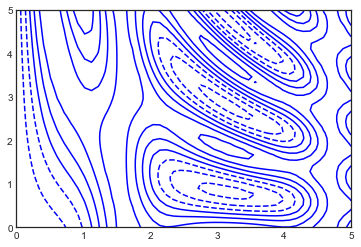

In [9]:
x1 = np.linspace(0, 5, 70)
y1 = np.linspace(0, 5, 60)

X1, Y1 = np.meshgrid(x1, y1)
Z1 = f(X1, Y1)
plt.contour(X, Y, Z, colors='blue');

 <div align="right">
<a href="#q1" class="btn btn-default" data-toggle="collapse">点击获取答案</a>

</div>
<div id="q1" class="collapse">
```
代码：
x1 = np.linspace(0, 5, 70)
y1 = np.linspace(0, 5, 60)

X1, Y1 = np.meshgrid(x1, y1)
Z1 = f(X1, Y1)
plt.contour(X, Y, Z, colors='blue');
    


```
</div>



 <div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> 练习 2:</h1>
<b>使用组合plt.contour, plt.contourf,和 plt.imshow，对练习1中的图进行修改，绘制蓝色等高线，将图的长度设为（10,10），看看会发生什么？</b>
</div>

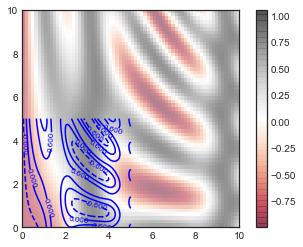

In [10]:
contours = plt.contour(X1, Y1, Z1, 3, colors='blue')
plt.clabel(contours, inline=True, fontsize=8)

plt.imshow(Z1, extent=[0, 10, 0, 10], origin='lower',
           cmap='RdGy', alpha=0.5)
plt.colorbar();

 <div align="right">
<a href="#q2" class="btn btn-default" data-toggle="collapse">点击获取答案</a>

</div>
<div id="q2" class="collapse">
```
代码：
contours = plt.contour(X1, Y1, Z1, 3, colors='blue')
plt.clabel(contours, inline=True, fontsize=8)

plt.imshow(Z1, extent=[0, 10, 0, 10], origin='lower',
           cmap='RdGy', alpha=0.5)
plt.colorbar();
    


```
</div>



这三个函数的组合—``plt.contour``, ``plt.contourf``,和 ``plt.imshow``在一个二维的情节中展示这类三维数据的可能性几乎是无限的。
有关这些函数中可用选项的更多信息，请参阅它们的文档字符串。